# HEART DISEASE PREDICTION ( Part-2)

In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Load the dataset, and view couple of the first rows.
data = pd.read_csv("heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#DATA EXPLORATION

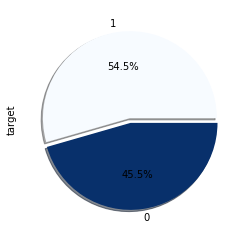

In [4]:
data.target.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.005,0.05],cmap='Blues')


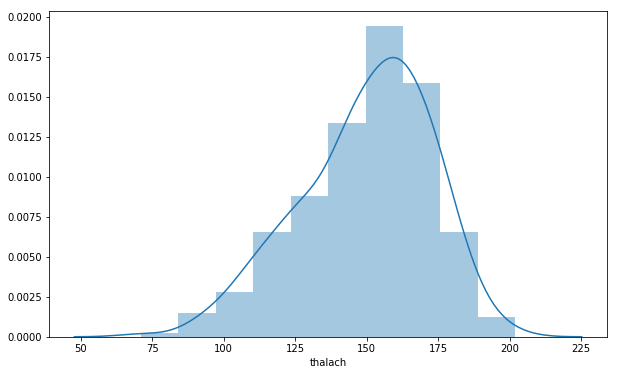

In [6]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,6))
x = data['thalach']
ax = sns.distplot(x, bins=10)
plt.show()
#thalach variable is slightly negatively skewed.

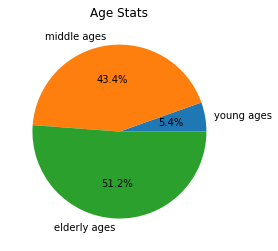

In [7]:
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
#print('Young Ages :',len(young_ages))
#print('Middle Ages :',len(middle_ages))
#print('Elderly Ages :',len(elderly_ages))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'], autopct='%1.1f%%')
plt.title('Age Stats')
plt.show()


Text(0.5, 1.0, 'People According to Chestpain Type')

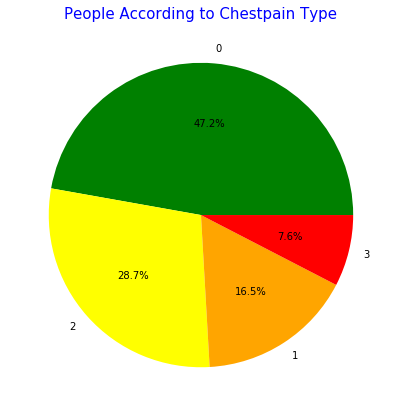

In [8]:
labels = data.cp.value_counts().index
colors = ['green','yellow','orange','red']
sizes = data.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('People According to Chestpain Type',color = 'blue',fontsize = 15)

## PREDICTION USING NEURAL NETWORK

In [7]:
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' stores our independent features
Y = data.target.values
X = data.drop(['target'], axis=1)

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


In [8]:
# Define a Neural Network Model
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [9]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=16, verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.8134 - accuracy: 0.5620 - val_loss: 0.6624 - val_accuracy: 0.5246
Epoch 2/100
16/16 - 0s - loss: 0.6777 - accuracy: 0.6198 - val_loss: 0.6297 - val_accuracy: 0.6393
Epoch 3/100
16/16 - 0s - loss: 0.6709 - accuracy: 0.5950 - val_loss: 0.6066 - val_accuracy: 0.7705
Epoch 4/100
16/16 - 0s - loss: 0.6402 - accuracy: 0.6570 - val_loss: 0.6025 - val_accuracy: 0.6393
Epoch 5/100
16/16 - 0s - loss: 0.6497 - accuracy: 0.5992 - val_loss: 0.5896 - val_accuracy: 0.7377
Epoch 6/100
16/16 - 0s - loss: 0.6398 - accuracy: 0.6281 - val_loss: 0.5319 - val_accuracy: 0.8197
Epoch 7/100
16/16 - 0s - loss: 0.6060 - accuracy: 0.6612 - val_loss: 0.5362 - val_accuracy: 0.7705
Epoch 8/100
16/16 - 0s - loss: 0.6049 - accuracy: 0.6653 - val_loss: 0.5665 - val_accuracy: 0.7213
Epoch 9/100
16/16 - 0s - loss: 0.5970 - accuracy: 0.7190 - val_loss: 0.5176 - val_accuracy: 0.7541
Epoch 10/100
16/16 - 0s - loss: 0.5818 - accuracy: 0.6901 - val_loss: 0.4912 - val_accuracy: 0.8525
Epoch 11/

**We plot the Model Accuracy, and Model Loss vs. the number of Epochs.**

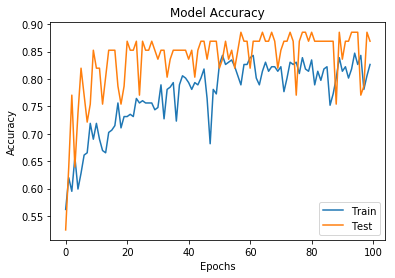

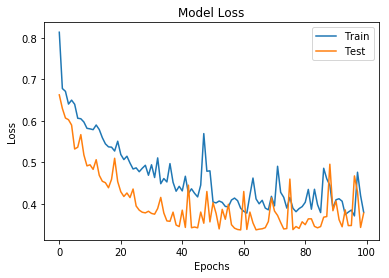

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

**PREDICTION**

In [12]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 86.88524590163934 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



> **Accuracy of neural network model is 86.8%**

## HOSPITAL RECOMMENDATION SYSTEM

#### The recommendation system will work as follow:
#### If a person is suffering from Cardiac disease and need a treatment, our system will help them to suggest the best hospital for there treatment in the preferred state.

In [1]:
from tkinter import *

class hospital:
    
    def __init__(self, state, hpname, hpcontact):
        self.state = state
        self.hpname = hpname
        self.hpcontact = hpcontact
        hospitalList.append(self)
        hospitalNames.append(state)
        hospitalContact.append(state)
        
        
def getData():
    for s in hospitalList:
        if s.state == selectedState.get():
            hpname.set(s.hpname) 
            hpcontact.set(s.hpcontact)

        
#create root object
mainWindow=Tk()
mainWindow.title("Hospital Recommendation System")

mainWindow.resizable(width=FALSE, height=FALSE)
#label1=Label(mainWindow,text = "Hospital Recommendation System", relief= "solid", width=40,font=("arial",15,"bold"))
mainWindow.geometry('500x400')
#label1.place(x=100 , y=100)
hospitalList = []
hospitalNames = []
hospitalContact =[]

hospital("Select the state for treatment", "", 11)
hospital("Andhra Pradesh", "Amrutha Heart Hospital", 7382299540)
hospital("Arunachal Pradesh","BLK Hospital", 9859954467)
hospital("Assam","SAAOL Heart Center, Guwahati",9859993307)
hospital("Bihar","Dr. Rajiv Krishna Heart Clinic Patna",9334242298)
hospital("Chhattisgarh","Ramkrishna Care hospital",771-6165656)
hospital("Delhi","Indraprastha Apollo Hospital",1126825580)
hospital("Goa","Manipal Hospitals Goa",18001025555)
hospital("Gujarat","Sri Sathya Sai Heart Hospital",2812573588)
hospital("Haryana","Medanta Heart Institute",1244141414)
hospital("Himachal Pradesh","APEX diagnostics",918894781112)
hospital("Jammu and Kashmir","Sudan Heart Care Centre", 1912262296)
hospital("Jharkhand","GEL Church Complex, Medical Centre",651233867)
hospital("Karnataka","Manipal Hospital",18001025555)
hospital("Kerala","Metromed International Cardiac Centre",4956615555)
hospital("Madhya Pradesh","Manoria Care",755424999)
hospital("Maharashtra","Nanavati Hospital",2226267500)
hospital("Manipur","Sky Hospital & Research Centre",8415938207)
hospital("Meghalaya","Nazareth Hospital",364221188)
hospital("Mizoram","Civil Hospital, Aizawl", 3892322318)
hospital("Nagaland","Zion Hospital",3862224117)
hospital("Orissa","HeartMate Institute",9040283301)
hospital("Punjab","Grecian Hospital",9592141409)
hospital("Rajasthan","Sanganer: Sparsh Hospital",7073554888)
hospital("Sikkim","STNM Hospital",9845562399)
hospital("Tamil Nadu","anandham heart care clinic",9443999783)
hospital("Telangana","MaxCure Hospital",404853330)
hospital("Tripura","ILS Hospitals, Agartala",8974050300)
hospital("Uttaranchal","Max Hospital",1357193000)
hospital("Uttar Pradesh","Pushpanjali Institute of Cardiac Sciences",8954893927)
hospital("West Bengal","Fortis Hospital",3366284444)


selectedState = StringVar()
selectedState.set(hospitalNames[0])

#state menu
hospitalMenu = OptionMenu(mainWindow,selectedState, *hospitalNames)
hospitalMenu.pack()

#select button
selectbtn= Button(mainWindow, text="Click here to get details", command=getData)
selectbtn.pack()

hpname = StringVar()
#label
hpLabel = Label(mainWindow,textvariable=hpname)
hpLabel.pack()

hpcontact = IntVar()
#label
hpLabel2 = Label(mainWindow,textvariable=hpcontact)
hpLabel2.pack()
mainWindow.mainloop()